# COMP47670 Assignment 2 - Shane Foley 

 ### Task 1 - Data Preprocessing

Import the required libraries for data preprocessing and for plotting the data. The initial file is loaded in separated by a tab delimiter.

In [1]:
# Imports for all of the tasks below
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import MinMaxScaler

file_path = "bank-tabular.csv" 
data = pd.read_csv(file_path, sep='\t') # tab seperator

In [2]:
data.isnull().sum() # Check for missing values
data.fillna(np.NaN, inplace= True) # Set to NaN using Numpy's method

# data.duplicated().sum() # Check for dupelicate Rows - None

In [3]:
print(data.columns)

Index(['customer_id', 'date', 'customer_gender', 'customer_age',
       'customer_location', 'customer_type', 'has_cc', 'has_mortgage',
       'convenience', 'customer_service', 'online_banking', 'interest_rates',
       'fees_charges', 'community_involvement', 'products_services',
       'privacy_security', 'reputation', 'satisfied'],
      dtype='object')


A check is done for any missing values in the dataset that may be blank, they are set to be NaN to be ignored later in the project. Upon further inspection of the dataset, I noticed there were several ways the `Gender` feature was inputted. I standardised this to be one of 'M' or 'F'.

In [4]:
# Set gender to M or F, NaN for Unspecified andNot Specified
# Standardize the customer_gender column
data['customer_gender'] = data['customer_gender'].replace({
    'm': 'M',
    'f': 'F',
    'Male': 'M',
    'Female': 'F',
    'Not Specified': np.NaN,
    'Unspecified': np.NaN,
    'Not specified': np.NaN,
})

# print(data['customer_gender'].unique()) # used to check for unique gender values

To double check and ensure the 'date' column would be handled as Timestamp data I used pandas function to set `to_datetime`. Categorical columns are then set to their appropriate types `bool` or `category`.

In [5]:
# Ensure column is treated as Date Time format
data['date'] = pd.to_datetime(data['date']) 

In [6]:
# Convert categorical columns to their appropriate data type
data['customer_gender'] = data['customer_gender'].astype('category')
data['customer_location'] = data['customer_location'].astype('category')
data['customer_type'] = data['customer_type'].astype('category')
data['has_cc'] = data['has_cc'].astype('bool')
data['has_mortgage'] = data['has_mortgage'].astype('bool')
data['satisfied'] = data['satisfied'].astype('bool')

In [7]:
# Normalise numerical data
scaler = MinMaxScaler()
numerical_columns = [
    'customer_age', 'convenience', 'customer_service', 'online_banking', 
    'interest_rates', 'fees_charges', 'community_involvement', 
    'products_services', 'privacy_security', 'reputation'
]
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

The numerical data is normalised above using the MinMax technique, setting a range of `0-1`. This is to mitigate the affect of any outliers and to assist in their comparison by having a standard in format.

### Task 2 - Data Characterisation

Below I used the `describe` method to get an overview of the dataset, to confirm the unique values in each columns aligned for categorical data and to view the count for each column.

In [8]:
# Summary statistics
print(data.describe(include='all'))

          customer_id                 date customer_gender  customer_age  \
count     3000.000000                 3000            2433   2530.000000   
unique            NaN                  695               2           NaN   
top               NaN  2021-02-01 00:00:00               F           NaN   
freq              NaN                   13            1258           NaN   
first             NaN  2021-01-05 00:00:00             NaN           NaN   
last              NaN  2022-12-22 00:00:00             NaN           NaN   
mean    193790.953667                  NaN             NaN      0.395700   
std     113369.592794                  NaN             NaN      0.198050   
min         26.000000                  NaN             NaN      0.000000   
25%      96685.000000                  NaN             NaN      0.229730   
50%     193998.500000                  NaN             NaN      0.405405   
75%     292016.500000                  NaN             NaN      0.540541   
max     3896

/var/folders/fy/7s2r7fq17zv4y61mv1xy844h0000gn/T/ipykernel_46737/899895426.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(data.describe(include='all'))


In [9]:
# Demographic Counts
print(data['customer_gender'].value_counts())
print("---------------------")
print(data['customer_location'].value_counts())
print("---------------------")
print(data['customer_type'].value_counts())

F    1258
M    1175
Name: customer_gender, dtype: int64
---------------------
Leinster    1248
Munster      777
Connacht     379
Ulster       231
Name: customer_location, dtype: int64
---------------------
Business         1461
Personal         1371
Business-Plus     168
Name: customer_type, dtype: int64


The above table is to highlight the breakdown of the customer profile of the Bank.

In [10]:
# Set palette & style for all the plots in the project
sns.set(style="whitegrid", palette="muted", color_codes=True)

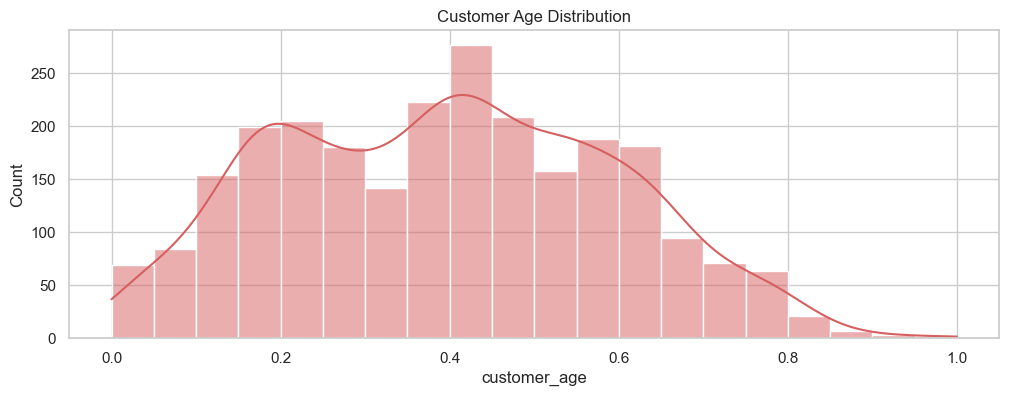

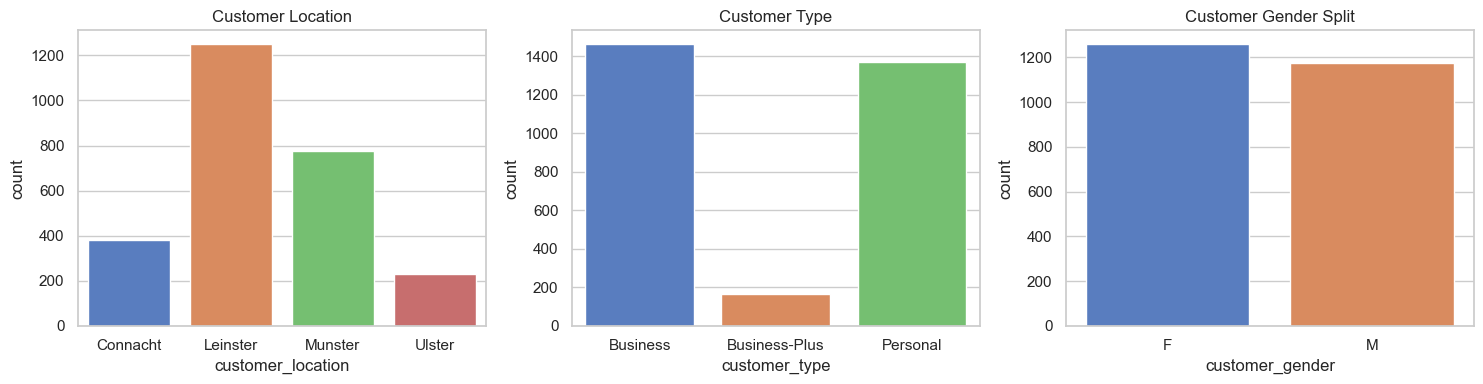

In [11]:
# Visualise the customer demographics
plt.figure(figsize=(12, 4))
sns.histplot(data=data, x='customer_age', bins=20, kde=True,color="r")
plt.title("Customer Age Distribution")
plt.show()

plt.figure(figsize=(15, 4))

# Customer Location
plt.subplot(1, 3, 1)
sns.countplot(data=data, x='customer_location')
plt.title("Customer Location")

# Customer Type
plt.subplot(1, 3, 2)
sns.countplot(data=data, x='customer_type')
plt.title("Customer Type")

# Customer Gender Split
plt.subplot(1, 3, 3)
sns.countplot(data=data, x='customer_gender')
plt.title("Customer Gender Split")

plt.tight_layout()
plt.show()


#### Grouped Analysis: `customer_gender`, `customer_location`, `customer_type`
The code below is used to print a table to portray the customer demographics, showing the mean age for each category. The rows containing full data for Age, Location, Gender and Type were used for this analysis.

In [12]:
# Group the data by Gender, Location, and Customer Type
grouped_data = data.groupby(['customer_gender', 'customer_location', 'customer_type'])

# Calculate the mean, minimum, and maximum age, and the count of customers for each group
age_stats = grouped_data['customer_age'].agg(['mean', 'count']).reset_index()

# Rename the columns
age_stats.columns = [
    'Gender', 'Location', 'Customer Type',
    'Average Age', 'Customer Count'
]

# Sort the table by 'Customer Count' from highest to least
age_stats = age_stats.sort_values('Customer Count', ascending=False)

# Display table
print("Number of customers in the table: " + str(sum(age_stats['Customer Count'])))
print(age_stats)


Number of customers in the table: 1804
   Gender  Location  Customer Type  Average Age  Customer Count
3       F  Leinster       Business     0.397962             236
15      M  Leinster       Business     0.411099             216
5       F  Leinster       Personal     0.384191             186
17      M  Leinster       Personal     0.409299             177
6       F   Munster       Business     0.391175             132
8       F   Munster       Personal     0.401382             131
18      M   Munster       Business     0.429108             126
20      M   Munster       Personal     0.391418             114
2       F  Connacht       Personal     0.396584              72
14      M  Connacht       Personal     0.403412              61
0       F  Connacht       Business     0.418919              58
12      M  Connacht       Business     0.385798              51
9       F    Ulster       Business     0.405980              47
21      M    Ulster       Business     0.420528              42
1

This table was created to give an idea of the customer profile for the Bank and who it appeals to the most. The most common customer is a Business customer from Leinster who is Female. Followed second by Male Business customers from Leinster. In each province, there are marginally more Female customers than there are Males. 

- Another interesting piece highlighted regarding the customer profile is the Business Plus account is the least popular by a high margin.

#### Temporal Aspects of the bank-tabular.csv Dataset

Firstly I took a look at the customer satisfaction levels and how they have changed over time in the dataset. Using the mean function on the boolean column 'satisfaction' which sets True to 1 and False to 0, creates a satisfaction rate for each month which we can now visualise to see the change over time.

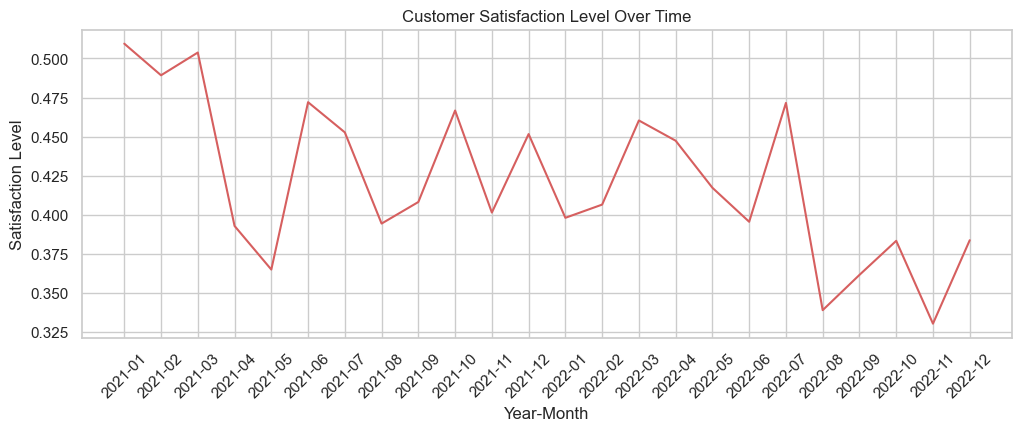

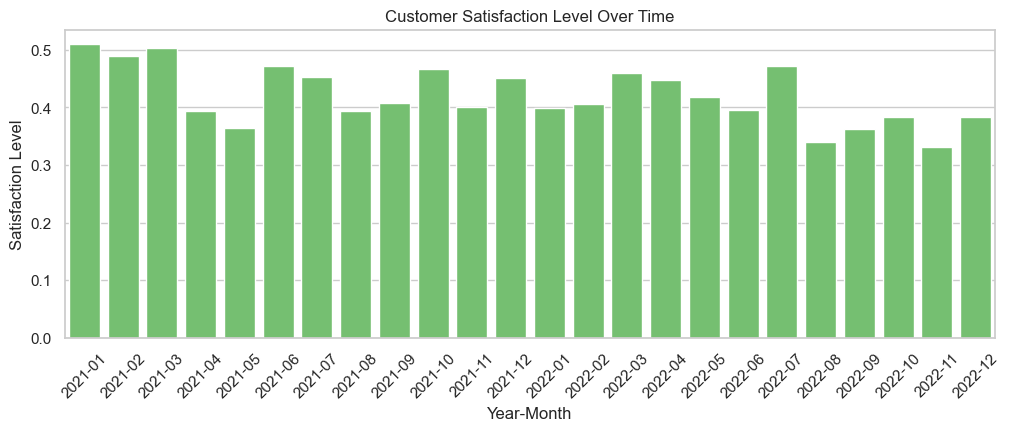

In [13]:
# Create column for the year and month
data['year_month'] = data['date'].dt.to_period('M')

# Get the mean satisfaction levels for each of the months
monthly_satisfaction = data.groupby('year_month')['satisfied'].mean().reset_index()

# Plot satisfaction levels over time as a line chart
plt.figure(figsize=(12, 4))
sns.lineplot(x=monthly_satisfaction['year_month'].astype(str), y=monthly_satisfaction['satisfied'], color="r")
plt.xlabel("Year-Month")
plt.ylabel("Satisfaction Level")
plt.title("Customer Satisfaction Level Over Time")
plt.xticks(rotation=45)
plt.show()

# Plot satisfaction levels over time as a bar chart
plt.figure(figsize=(12, 4))
sns.barplot(x=monthly_satisfaction['year_month'].astype(str), y=monthly_satisfaction['satisfied'], color="g")
plt.xlabel("Year-Month")
plt.ylabel("Satisfaction Level")
plt.title("Customer Satisfaction Level Over Time")
plt.xticks(rotation=45)
plt.show()

From the above visualisation of the satisfaction over the period given by the dataset, there is a clear downward trend starting from the first month provided to us `January 2021`. There is then a sharp decline in the first few months and between the period `05/21` to `07/22` we see the levels range frequently between the levels `0.375` & `0.475`.

### Location Grouped Visualisations

#### Satisfaction by Location

From the above visualisations I decide to investigate the satisfaction rates further and see whether the location of the customer had an impact on their satisfaction rate, I believed this would be an insightful metric to combine with the satisfaction rates as the levels of customer service and convenience levels most likely varies per location and branch to branch depending on a number of factors: for example staff training, staff attitude, nearest branch location, opening hours of the branch etc.

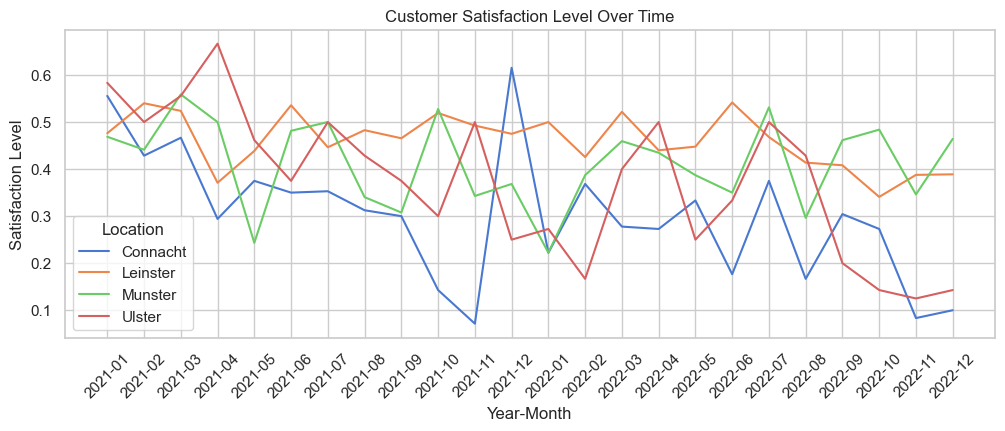

In [14]:
# Get the mean satisfaction levels for each month and location
monthly_satisfaction = data.groupby(['year_month', 'customer_location'])['satisfied'].mean().reset_index()

# Plot satisfaction levels over time as a line chart
plt.figure(figsize=(12, 4))
sns.lineplot(x=monthly_satisfaction['year_month'].astype(str), y=monthly_satisfaction['satisfied'], hue=monthly_satisfaction['customer_location'])
plt.xlabel("Year-Month")
plt.ylabel("Satisfaction Level")
plt.title("Customer Satisfaction Level Over Time")
plt.xticks(rotation=45)
plt.legend(title="Location")
plt.show()

The above graph depicts the average monthly satisfaction rate for each of the 4 provinces, it is evident that satisfaction rates fluctuate consistently across each location. Leinster has performed the most consistently, we must also take into account that this could be a result of a larger customer base, outliers in the dataset are less likely to skew the mean for each month. The service here might also be better due to Leinster having the largest customer base in the dataset at `1248`

A downward trajectory can be seen overall with Connacht in particular performing poorly in more recent months, the rate in `January 2021` was sitting above `0.5` with the most recent two months dropping to less than `0.1`.

The above line chart highlights that further investigation may be needed for both Ulster and Connacht, to try and capture any issues arising in these locations. From the figures shown below the satisfaction levels in areas with fewer customers are lower, this could be a result of less investment in these locations from the Bank as they are likely less of a priority than the more populous areas.

- Connacht     379
- Ulster       231
- Leinster    1248
- Munster      777


#### Satisfaction levels correlation to ratings

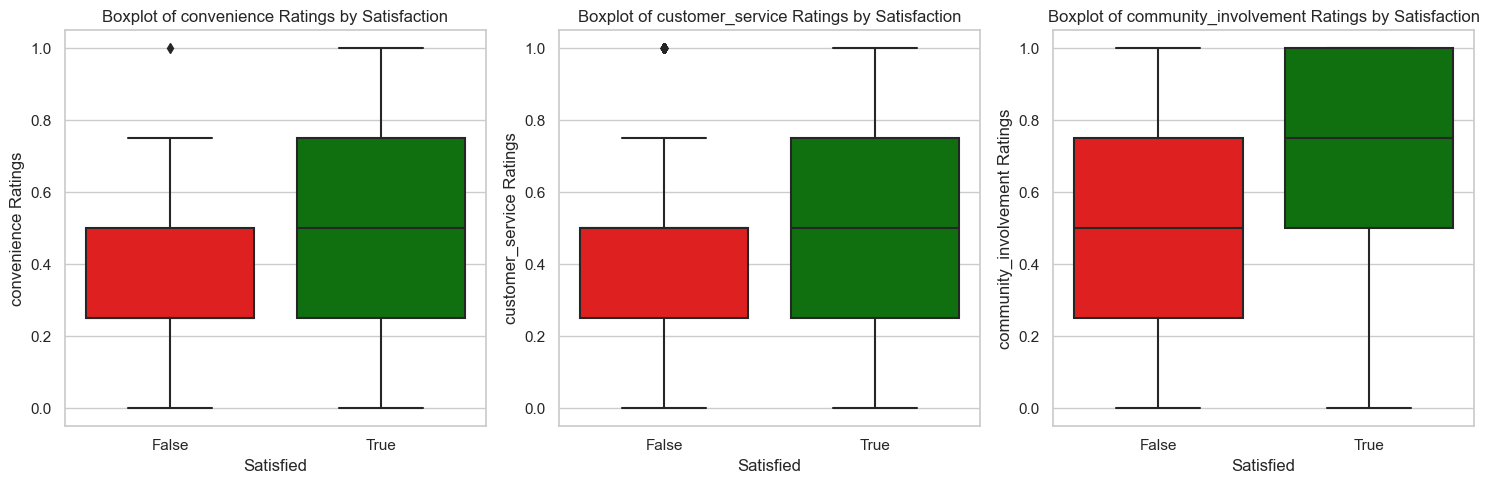

In [15]:
# List of features that may vary at a local level
local_rating_headers = ['convenience', 'customer_service', 'community_involvement']

fig, axs = plt.subplots(nrows=1, ncols=len(local_rating_headers), figsize=(15, 5))

for i, col in enumerate(local_rating_headers):
    sns.boxplot(data=data, x='satisfied', y=col, palette=['red', 'green'], ax=axs[i])
    axs[i].set_title(f'Boxplot of {col} Ratings by Satisfaction')
    axs[i].set_xlabel('Satisfied')
    axs[i].set_ylabel(f'{col} Ratings')

plt.tight_layout()
plt.show()

The above three box plots depict the correlation between the customer's rating for `Convenience`, `Customer Service`, and `Community Involvement`, it is clear that all three of these features are important contributors to the customer's overall rating of satisfaction. Higher ratings in these areas are leading to a greater chance of the `Satisfaction` label being set to `True`.

## Task 3 - Tabular Data Classification

The required imports to use in Task 3, the libraries for the models used and the evaluation metrics can be found below.

In [16]:
# Load Imports for ML tasks

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import ConfusionMatrixDisplay, roc_auc_score, confusion_matrix 

# Import Encoders for further preprocessing

from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [17]:
# Seperate data features from the target variable

rand = 19;
X = data.drop(columns=['satisfied', 'date', 'year_month'])
y = data['satisfied']

The original dataset `bank-tabular.csv` is split into features (X) and target (y) splits. `Satisfaction` is set as the target value and the rest of the features are used as X.

- To simplify the dataset and assist the models in training I use `LabelEncoder` on the target setting `True` to 1 and `False` to 0.
- I believed `OneHotEncoder` is the most appropriate encoder for this particular dataset, this was used to transform the categorical features and encode X below.

#### Encode the data: LabelEncoder (y) & OneHotEncoder (X)

In [18]:
# LabelEncode the target variable y: Satisfaction

lab_encoder = LabelEncoder()
y = lab_encoder.fit_transform(y)
print(y.shape)
y

(3000,)


array([1, 1, 1, ..., 0, 1, 1])

In [19]:
# transform categorical features in the dataset using OneHot encoding library

onehot_encoder = OneHotEncoder()
dataOH = onehot_encoder.fit_transform(X)

# split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(dataOH, y, test_size=0.5, random_state=rand)

After splitting the data set 50/50 between train and split, I began implementing the GradientBoost Classifier. This classifier is an ensemble model That uses an iterative process using different models one by one, to fix the previous mistakes of past models, focusing on the samples missed and increasing weights accordingly (as learned in COMP47750).

- I found `max_depth` = 5 to return slightly improved accuracy results when running the model a number of times through trial and error.

### GradientBoost Classifier

In [20]:
# Fit the training data to the first model Gradient Boosting Classifier

gbc = GradientBoostingClassifier(max_depth = 5) # hyperparamter improvement: through trial and error setting 
gbc.fit(X_train, y_train)                       # the max_depth of the trees increased accuracy slightly by roughly 1%

y_dash = gbc.predict(X_test)

In [21]:
# Check the accuracy for the Gradient Boosting Classifier

accuracy = accuracy_score(y_test, y_dash)
print('Accuracy: %.2f' % (accuracy*100))
confusion = confusion_matrix(y_test, y_dash)
print("Confusion matrix:\n{}".format(confusion))

Accuracy: 86.93
Confusion matrix:
[[829  73]
 [123 475]]


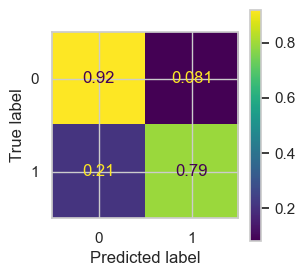

In [22]:
cm = confusion_matrix(y_test, y_dash, normalize = 'true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=gbc.classes_)
fig, ax = plt.subplots(figsize=(3,3))
disp.plot(ax=ax)

The above confusion matrix highlights where the accuracy is falling off with this model, its predictions on instances that are actually negative (False) are incorrectly classified as positive (True). [121 477]

In [23]:
# Additional evaluation methods using SciKits other libraries precision_score, recall_score, f1_score, roc_auc_score,

precision = precision_score(y_test, y_dash)
recall = recall_score(y_test, y_dash)
f1 = f1_score(y_test, y_dash)
roc_auc = roc_auc_score(y_test, y_dash)

print("Precision: %.2f" % precision)
print("Recall: %.2f" % recall)
print("F1 score: %.2f" % f1)
print("ROC AUC: %.2f" % roc_auc)

Precision: 0.87
Recall: 0.79
F1 score: 0.83
ROC AUC: 0.86


In comparison to the other Classifiers that I implemented below the GradientBoost Classifier consistently proved the most accurate of the three, with the accuracy score of its predictions on this dataset returning at roughly `87%` after many different tests of the model.

### DecisionTree Classifier

Using the scikit library I implement the DecisionTree Classifier on the dataset, first fitting it on the training split and then running a prediction on the test set. In the same order as the above Classifier.

In [24]:
# Fit the training data to the first model Gradient Boosting Classifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

y_dash = dtc.predict(X_test)

In [25]:
# Check the accuracy for DecisionTreeClassifier()

accuracy = accuracy_score(y_test, y_dash)
print('Accuracy: %.2f' % (accuracy*100))
confusion = confusion_matrix(y_test, y_dash)
print("Confusion matrix:\n{}".format(confusion))

Accuracy: 83.67
Confusion matrix:
[[794 108]
 [137 461]]


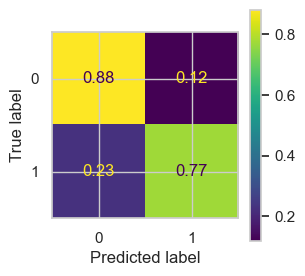

In [26]:
cm = confusion_matrix(y_test, y_dash, normalize = 'true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=dtc.classes_)
fig, ax = plt.subplots(figsize=(3,3))
disp.plot(ax=ax)

In [27]:
# Additional evaluation methods

precision = precision_score(y_test, y_dash)
recall = recall_score(y_test, y_dash)
f1 = f1_score(y_test, y_dash)
roc_auc = roc_auc_score(y_test, y_dash)

print("Precision: %.2f" % precision)
print("Recall: %.2f" % recall)
print("F1 score: %.2f" % f1)
print("ROC AUC: %.2f" % roc_auc)

Precision: 0.81
Recall: 0.77
F1 score: 0.79
ROC AUC: 0.83


Of the three implementations that I tested on the dataset, this model proved to be the least effective at predicting the class label `satisfaction`. Multiple tests returned a score of just under `84%` at a consistent rate.

### KNN Classifier

For the last classifier used in Task 3, I selected the K Nearest Neighbour. I found upon trial and error that setting the hyperparameter for `K` to 9 returned nearly a 1% increase in accuracy consistently when compared to the default value of 5. This may be a result of the dataset having a large number of data points at 3,000 and a large number of features.

In [28]:
knn = KNeighborsClassifier(n_neighbors = 9) # value 9 returning best accuracy compared to 3,5,7
knn.fit(X_train, y_train)
warnings.filterwarnings("ignore", category=FutureWarning)  # Ignore the future warning about changes

y_dash = knn.predict(X_test)

In [29]:
# Check the accuracy for KNeighborsClassifier()

accuracy = accuracy_score(y_test, y_dash)
print('Accuracy: %.2f' % (accuracy*100))
confusion = confusion_matrix(y_test, y_dash)
print("Confusion matrix:\n{}".format(confusion))


Accuracy: 84.80
Confusion matrix:
[[784 118]
 [110 488]]


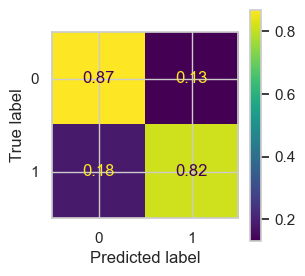

In [30]:
cm = confusion_matrix(y_test, y_dash, normalize = 'true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=knn.classes_)
fig, ax = plt.subplots(figsize=(3,3))
disp.plot(ax=ax)

In [31]:
# Additional evaluation methods

precision = precision_score(y_test, y_dash)
recall = recall_score(y_test, y_dash)
f1 = f1_score(y_test, y_dash)
roc_auc = roc_auc_score(y_test, y_dash)

print("Precision: %.2f" % precision)
print("Recall: %.2f" % recall)
print("F1 score: %.2f" % f1)
print("ROC AUC: %.2f" % roc_auc)

Precision: 0.81
Recall: 0.82
F1 score: 0.81
ROC AUC: 0.84


The kNN Classifier proved to be the second most accurate at predicting the test cases and unseen data. When changing the K value the model improved from an accuracy score of `Accuracy: 84.13` to `Accuracy: 84.80`

## Task 4 - Text Data Classification

- Required imports for the final Task, `CountVectorizer` & `TfidfTransformer` were used to preprocess the data. 
- For the classifiers I selected `MultinomialNB`, `SVC` and `kNN`.

The second dataset is loaded in `bank-comments.csv` separated by a tab the same as the first, any NaN values are replaced with blanks. Finally, the dataset is merged with the original using the id `customer_id` to match.

In [32]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn import metrics

comment_data = pd.read_csv("bank-comments.csv", sep='\t')
comment_data['comments'] = comment_data['comments'].fillna('') #replace NaN with blanks

# Merge tabular and text datasets based on the customer_id column
data = pd.merge(data, comment_data, on="customer_id") # no dupelicates, we can match on id, 3000 unique customer_id

In [33]:
X = data['comments'] # features
y = data['satisfied'] # target  // i found label encoder has no effect on the accuracy, left target as True/False

I used the same process as previous, setting the target label `satisfied` (y) and the features being the `comments` this time (X). As per the slides a split of 80/20 is sued to train and test the text data.

In [34]:
# Split the data X and Y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rand)

### KNN Classifier

I implemented the models for the text label prediction using pipelines. Firstly, I implemented the kNN classifier on the text data, fitting the train data to the model. The libraries `CountVectorizer` and `TfidfTransformer` are used to vectorise and transform the data into TF-IDF representation.

In [35]:
# Pipeline to classify text using kNN

pipeline_knn = Pipeline([
    ('vect', CountVectorizer(stop_words="english")),
    ('tfidf', TfidfTransformer()),
    ('clf', KNeighborsClassifier()),
])

pipeline_knn.fit(X_train, y_train)
predicted_knn = pipeline_knn.predict(X_test)

In [36]:
accuracy_knn = metrics.accuracy_score(y_test, predicted_knn)
recall_knn = metrics.recall_score(y_test, predicted_knn, average='macro')
print('Accuracy for kNN: %.2f' % (accuracy_knn*100))
print('Recall for kNN: %.2f' % (recall_knn*100))

Accuracy for kNN: 81.83
Recall for kNN: 78.95


The kNN classifier returned an accuracy of `81.83%` on predicting the text data. The True positive rate being `78.95%`.

This indicates that the classifier is performing reasonably well overall, although we can improved on this. Out of the three models that I tested this performed the worst on the dataset.

### SVM Classifier

In [37]:
# Pipeline to classify text using SVM

pipeline_svm = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', SVC()),
])

pipeline_svm.fit(X_train, y_train)
predicted_svm = pipeline_svm.predict(X_test)

In [38]:
accuracy_svm = metrics.accuracy_score(y_test, predicted_svm)
recall_svm = metrics.recall_score(y_test, predicted_svm, average='macro')
print('Accuracy for SVM: %.2f' % (accuracy_svm*100))
print('Recall for SVM: %.2f' % (recall_svm*100))

Accuracy for SVM: 88.50
Recall for SVM: 85.81


The SVM classifier returned the best overall results for my implementation at an accuracy prediction rate of `88.5%`. The improvements over the kNN model being quite significant.


`Accuracy for SVM: 88.50`

`Recall for SVM: 85.81`

### Multinomial Naive Bayes Classifier

In [39]:
# Pipeline to classify text using Multinomial Naive Bayes

pipeline_nb = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB()),
])

pipeline_nb.fit(X_train, y_train)
predicted_nb = pipeline_nb.predict(X_test)

In [40]:
accuracy_nb = metrics.accuracy_score(y_test, predicted_nb)
recall_nb = metrics.recall_score(y_test, predicted_nb, average='macro')
print('Accuracy for Naive Bayes: %.2f' % (accuracy_nb*100))
print('Recall for Naive Bayes: %.2f' % (recall_nb*100))

Accuracy for Naive Bayes: 87.50
Recall for Naive Bayes: 84.50


Multinomial Naive Bayes also performed well on the text data, returning an accuracy score of `87.5%` overall on the predictions. This might be improved with further tuning of the hyper parameters from the default sets. 

## Task 5 - Findings & Conclusions

### Findings Summary

#### `bank-tabular.csv`
Overall for the Banks tabular dataset, the GradientBoost Classifier returned the best accuracy results at `86.87%`, this is a strong performance result but can be improved. Some of the suggestions below might help increase this model's performance further. The main issue I discovered is that it predicts negative instances (False) incorrectly as positive (True).

#### `bank-comments.csv`
The models that implemented the comments data set from the Banks customers performed better overall with the Naive Bayes method I used reaching an accuracy score of `87.5%` and the SVM model reaching `88.5%`. These scores could potentially be improved with further preprocessing, the Bank could identify irrelevant words and use a complex custom word filter to attempt to improve the performance. One could also adjust the weights of certain words to tune this further.

#### Comparison
In my findings the text data classification performed better overall, this could be due to the focus on one feature, the comments data point, the tabular dataset has several different ratings and features that could be overcomplicating the models which I have selected to test. Which could potentially cause the models to overfit.

#### Challenges
While implementing the different algorithms from sci-kit learn I found it difficult to gain insight into what was working and going wrong in the models when testing, should an error arise or results return not as expected it is more challenging to resolve. The libraries from Scikit provide useful output and error messages but we cannot easily access their inner workings.


### Further Analysis & Improvements

`Feature Selection` - Some of the features may likely prove insignificant to the overall outcome of the class label satisfaction, this would be an interesting area to look into to try and narrow down the important features for prediction in an attempt to reduce noise and increase the overall accuracy.

`Cross Validation` - This technique of more subsets of the dataset may also assist in reducing the bias of the models. The dataset is large so it might be suited to this approach.

`Hyperparameter tuning` - In my study of the dataset I found that setting the k value to 9 improved the accuracy slightly through trial and error. Further tuning of the hyperparameters could likely increase the performance of the models. A grid search would be suited in this case.

`Encoding` - Other encoding techniques could be looked at for further improvement of the model's performance. 

`Models` - Further models and machine learning algorithms could be tested on the datasets to try and find improved outcomes.

### Conclusion

In its current form, for this project, the most optimal solution for the bank is to implement the `bank-comments.csv` data along with a `Support Vector Machine` algorithm, which is generally effective at complex datasets. The models used are performing well overall at a range of `81%` to `88.5%`, it is possible with the steps and improvements outlined above that a different algorithm would prove most effective at classification. 


--------------------------------------

##### References - 

Scikit-learn: Machine Learning in Python, Pedregosa et al., JMLR 12, pp. 2825-2830, 2011.

Available at:`https://jmlr.csail.mit.edu/papers/v12/pedregosa11a.html`
